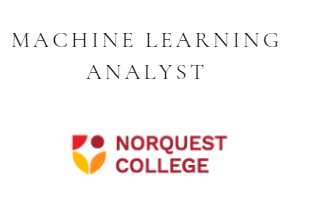

In [117]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [119]:
# Load the dataset (replace with your actual dataset)
data = pd.read_csv('Food_Drive_Data_Collection_2024.csv')

In [120]:
data.head()

ID        Start time   Completion time      Email  Name  \
0  23  9-25-24 16:56:05  9-25-24 16:57:23  anonymous   NaN   
1  23  9-25-24 16:56:05  9-25-24 16:57:23  anonymous   NaN   
2  25  9-28-24 10:01:37  9-28-24 10:05:20  anonymous   NaN   
3  26  9-28-24 10:31:19  9-28-24 10:34:00  anonymous   NaN   
4  27  9-28-24 10:33:28  9-28-24 10:36:55  anonymous   NaN   

  How did you receive the form?         Drop Off Location              Stake  \
0                     In person           Bearspaw Chapel    Riverbend Stake   
1                     In person           Bearspaw Chapel    Riverbend Stake   
2                     In person        Londonberry Chapel  Bonnie Doon Stake   
3                     In person     Gateway Stake Centre       Gateway Stake   
4                     In person  Bonnie Doon Stake Centre  Bonnie Doon Stake   

     Bonnie Doon Stake Edmonton North Stake  ...  \
0                  NaN                  NaN  ...   
1                  NaN                  NaN  ...   
2       Clareview Ward                  NaN  ...   
3                  NaN                  NaN  ...   
4  Forest Heights Ward                  NaN  ...   

  How many routes did you complete? Additional Routes completed (2 routes)  \
0                               NaN                                    NaN   
1                               NaN                                    NaN   
2                               NaN                                    NaN   
3                               NaN                                    NaN   
4                               NaN                                    NaN   

   Additional routes completed (3 routes)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

  Additional routes completed (3 routes)2  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

  Additional routes completed (More than 3 Routes)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  Additional routes completed (More than 3 Routes)2  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Additional routes completed (More than 3 Routes)3  Comment Sentiments  \
0                                                NaN                 NaN   
1                                                NaN                 NaN   
2                                                NaN                 NaN   
3                                                NaN                 NaN   
4                                                NaN                 NaN   

   Comments or Feedback      COMBINED STAKES  
0                   NaN        Woodbend Ward  
1                   NaN        Woodbend Ward  
2                   NaN       Clareview Ward  
3                   NaN       Lee Ridge Ward  
4                   NaN  Forest Heights Ward  

[5 rows x 31 columns]

In [121]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID                                                     448 non-null    int64  
 1   Start time                                             448 non-null    object 
 2   Completion time                                        448 non-null    object 
 3   Email                                                  448 non-null    object 
 4   Name                                                   0 non-null      float64
 5   How did you receive the form?                          448 non-null    object 
 6   Drop Off Location                                      448 non-null    object 
 7   Stake                                                  448 non-null    object 
 8   Bonnie Doon Stake                                 

In [122]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
data = data.drop(columns=['ID','Email', 'Name', 'Additional Routes completed (2 routes)', 'Additional routes completed (3 routes)', 'Additional routes completed (3 routes)2', 'Additional routes completed (More than 3 Routes)', 'Additional routes completed (More than 3 Routes)2', 'Additional routes completed (More than 3 Routes)3', 'Route Number/Name', 'Sherwood Park Stake'])


In [123]:
data.head()

Start time   Completion time How did you receive the form?  \
0  9-25-24 16:56:05  9-25-24 16:57:23                     In person   
1  9-25-24 16:56:05  9-25-24 16:57:23                     In person   
2  9-28-24 10:01:37  9-28-24 10:05:20                     In person   
3  9-28-24 10:31:19  9-28-24 10:34:00                     In person   
4  9-28-24 10:33:28  9-28-24 10:36:55                     In person   

          Drop Off Location              Stake    Bonnie Doon Stake  \
0           Bearspaw Chapel    Riverbend Stake                  NaN   
1           Bearspaw Chapel    Riverbend Stake                  NaN   
2        Londonberry Chapel  Bonnie Doon Stake       Clareview Ward   
3     Gateway Stake Centre       Gateway Stake                  NaN   
4  Bonnie Doon Stake Centre  Bonnie Doon Stake  Forest Heights Ward   

  Edmonton North Stake   Gateway Stake Riverbend Stake YSA Stake  \
0                  NaN             NaN   Woodbend Ward       NaN   
1                  NaN             NaN   Woodbend Ward       NaN   
2                  NaN             NaN             NaN       NaN   
3                  NaN  Lee Ridge Ward             NaN       NaN   
4                  NaN             NaN             NaN       NaN   

  Time Spent Collecting Donations  \
0                  0 - 30 Minutes   
1                  0 - 30 Minutes   
2                  0 - 30 Minutes   
3                  0 - 30 Minutes   
4                  0 - 30 Minutes   

   # of Adult Volunteers who participated in this route  \
0                                                  7      
1                                                  7      
2                                                  1      
3                                                  2      
4                                                  2      

   # of Youth Volunteers who participated in this route\n  \
0                                                  7        
1                                                  7        
2                                                  0        
3                                                  2        
4                                                  2        

   # of Doors in Route  # of Donation Bags Collected  \
0                 78.0                           599   
1                 78.0                           599   
2                  1.0                             1   
3                 20.0                            20   
4                 20.0                            15   

  Did you complete more than 1 route? How many routes did you complete?  \
0                                  No                               NaN   
1                                  No                               NaN   
2                                  No                               NaN   
3                                  No                               NaN   
4                                  No                               NaN   

  Comment Sentiments Comments or Feedback      COMBINED STAKES  
0                NaN                  NaN        Woodbend Ward  
1                NaN                  NaN        Woodbend Ward  
2                NaN                  NaN       Clareview Ward  
3                NaN                  NaN       Lee Ridge Ward  
4                NaN                  NaN  Forest Heights Ward

In [124]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Start time                                             448 non-null    object 
 1   Completion time                                        448 non-null    object 
 2   How did you receive the form?                          448 non-null    object 
 3   Drop Off Location                                      448 non-null    object 
 4   Stake                                                  448 non-null    object 
 5   Bonnie Doon Stake                                      119 non-null    object 
 6   Edmonton North Stake                                   43 non-null     object 
 7   Gateway Stake                                          169 non-null    object 
 8   Riverbend Stake                                   

In [125]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['Start time'] = pd.to_datetime(data['Start time'])
data['Completion time'] = pd.to_datetime(data['Completion time'])

# Calculate the time spent and create a new column "Time Spent"
data['Time Spent'] = (data['Completion time'] - data['Start time']).dt.total_seconds() / 60

# Print the updated DataFrame
print(data[['Start time', 'Completion time', 'Time Spent']])

             Start time     Completion time  Time Spent
0   2024-09-25 16:56:05 2024-09-25 16:57:23    1.300000
1   2024-09-25 16:56:05 2024-09-25 16:57:23    1.300000
2   2024-09-28 10:01:37 2024-09-28 10:05:20    3.716667
3   2024-09-28 10:31:19 2024-09-28 10:34:00    2.683333
4   2024-09-28 10:33:28 2024-09-28 10:36:55    3.450000
..                  ...                 ...         ...
443 2024-09-30 17:57:32 2024-09-30 17:59:22    1.833333
444 2024-09-30 18:35:29 2024-09-30 18:36:11    0.700000
445 2024-09-30 22:28:55 2024-09-30 22:32:37    3.700000
446 2024-10-01 06:46:21 2024-10-01 06:53:31    7.166667
447 2024-10-01 08:13:07 2024-10-01 08:25:02   11.916667

[448 rows x 3 columns]


<ipython-input-125-448e014acfae>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Start time'] = pd.to_datetime(data['Start time'])
<ipython-input-125-448e014acfae>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Completion time'] = pd.to_datetime(data['Completion time'])


In [126]:
data['How many routes did you complete?'] = data['How many routes did you complete?'].fillna(1)
data.head()

Start time     Completion time How did you receive the form?  \
0 2024-09-25 16:56:05 2024-09-25 16:57:23                     In person   
1 2024-09-25 16:56:05 2024-09-25 16:57:23                     In person   
2 2024-09-28 10:01:37 2024-09-28 10:05:20                     In person   
3 2024-09-28 10:31:19 2024-09-28 10:34:00                     In person   
4 2024-09-28 10:33:28 2024-09-28 10:36:55                     In person   

          Drop Off Location              Stake    Bonnie Doon Stake  \
0           Bearspaw Chapel    Riverbend Stake                  NaN   
1           Bearspaw Chapel    Riverbend Stake                  NaN   
2        Londonberry Chapel  Bonnie Doon Stake       Clareview Ward   
3     Gateway Stake Centre       Gateway Stake                  NaN   
4  Bonnie Doon Stake Centre  Bonnie Doon Stake  Forest Heights Ward   

  Edmonton North Stake   Gateway Stake Riverbend Stake YSA Stake  ...  \
0                  NaN             NaN   Woodbend Ward       NaN  ...   
1                  NaN             NaN   Woodbend Ward       NaN  ...   
2                  NaN             NaN             NaN       NaN  ...   
3                  NaN  Lee Ridge Ward             NaN       NaN  ...   
4                  NaN             NaN             NaN       NaN  ...   

  # of Adult Volunteers who participated in this route  \
0                                                  7     
1                                                  7     
2                                                  1     
3                                                  2     
4                                                  2     

   # of Youth Volunteers who participated in this route\n  \
0                                                  7        
1                                                  7        
2                                                  0        
3                                                  2        
4                                                  2        

   # of Doors in Route  # of Donation Bags Collected  \
0                 78.0                           599   
1                 78.0                           599   
2                  1.0                             1   
3                 20.0                            20   
4                 20.0                            15   

   Did you complete more than 1 route? How many routes did you complete?  \
0                                   No                                 1   
1                                   No                                 1   
2                                   No                                 1   
3                                   No                                 1   
4                                   No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES Time Spent  
0                NaN                  NaN        Woodbend Ward   1.300000  
1                NaN                  NaN        Woodbend Ward   1.300000  
2                NaN                  NaN       Clareview Ward   3.716667  
3                NaN                  NaN       Lee Ridge Ward   2.683333  
4                NaN                  NaN  Forest Heights Ward   3.450000  

[5 rows x 21 columns]

In [127]:
data['Time Spent Collecting Donations'].unique()

array(['0 - 30 Minutes', '30 - 60 Minutes', '1 Hour - 1.5 Hours',
       '2+ Hours'], dtype=object)

In [131]:
data['Time Spent Collecting Donations'].value_counts()

Time Spent Collecting Donations
30 - 60 Minutes       176
1 Hour - 1.5 Hours    125
0 - 30 Minutes        106
2+ Hours               41
Name: count, dtype: int64

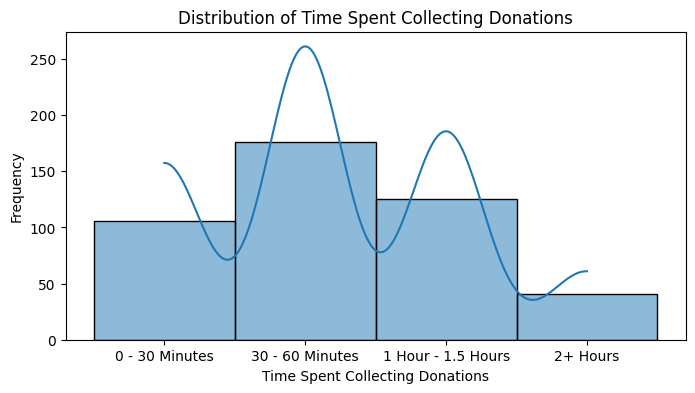

In [132]:
numerical_columns = ['Time Spent Collecting Donations']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [133]:
data['Drop Off Location'].unique()

array(['Bearspaw Chapel', 'Londonberry Chapel', 'Gateway Stake Centre ',
       'Bonnie Doon Stake Centre', 'Riverbend Stake Centre',
       'Edmonton North Stake Centre', 'Communities Outside Edmonton'],
      dtype=object)

In [134]:
data['Stake'].unique()

array(['Riverbend Stake', 'Bonnie Doon Stake', 'Gateway Stake',
       'Edmonton North Stake', 'YSA Stake'], dtype=object)

In [135]:
data['Bonnie Doon Stake'].unique()

array([nan, 'Clareview Ward', 'Forest Heights Ward', 'Londonderry Ward',
       'Connors Hill Ward', 'Southgate Ward'], dtype=object)

In [136]:
data['Edmonton North Stake'].unique()

array([nan, 'Griesbach Ward', 'Namao Ward'], dtype=object)

In [137]:
data['Gateway Stake'].unique()

array([nan, 'Lee Ridge Ward', 'Silver Berry Ward', 'Crawford Plains Ward',
       'Blackmud Creek Ward', 'Ellerslie Ward', 'Wild Rose Ward',
       'Rio Vista Ward', 'Beaumont Ward', 'Wainwright Branch'],
      dtype=object)

In [138]:
data['Riverbend Stake'].unique()

array(['Woodbend Ward', nan, 'Rutherford Ward', 'Rabbit Hill Ward',
       'Greenfield Ward', 'Terwillegar Park Ward', 'Devon Ward'],
      dtype=object)

In [139]:
data['YSA Stake'].unique()

array([nan, 'Mill Creek YSA Ward', 'Whitemud Creek YSA Ward'],
      dtype=object)

In [140]:
data['How many routes did you complete?'].unique()

array([1, '2', '3', 'More than 3'], dtype=object)

In [141]:
# removing the missing values in the comments column by filling "No comments" in place of the missing values
data['Comment Sentiments'] = data['Comment Sentiments'].fillna('No Comments')
data.head()

Start time     Completion time How did you receive the form?  \
0 2024-09-25 16:56:05 2024-09-25 16:57:23                     In person   
1 2024-09-25 16:56:05 2024-09-25 16:57:23                     In person   
2 2024-09-28 10:01:37 2024-09-28 10:05:20                     In person   
3 2024-09-28 10:31:19 2024-09-28 10:34:00                     In person   
4 2024-09-28 10:33:28 2024-09-28 10:36:55                     In person   

          Drop Off Location              Stake    Bonnie Doon Stake  \
0           Bearspaw Chapel    Riverbend Stake                  NaN   
1           Bearspaw Chapel    Riverbend Stake                  NaN   
2        Londonberry Chapel  Bonnie Doon Stake       Clareview Ward   
3     Gateway Stake Centre       Gateway Stake                  NaN   
4  Bonnie Doon Stake Centre  Bonnie Doon Stake  Forest Heights Ward   

  Edmonton North Stake   Gateway Stake Riverbend Stake YSA Stake  ...  \
0                  NaN             NaN   Woodbend Ward       NaN  ...   
1                  NaN             NaN   Woodbend Ward       NaN  ...   
2                  NaN             NaN             NaN       NaN  ...   
3                  NaN  Lee Ridge Ward             NaN       NaN  ...   
4                  NaN             NaN             NaN       NaN  ...   

  # of Adult Volunteers who participated in this route  \
0                                                  7     
1                                                  7     
2                                                  1     
3                                                  2     
4                                                  2     

   # of Youth Volunteers who participated in this route\n  \
0                                                  7        
1                                                  7        
2                                                  0        
3                                                  2        
4                                                  2        

   # of Doors in Route  # of Donation Bags Collected  \
0                 78.0                           599   
1                 78.0                           599   
2                  1.0                             1   
3                 20.0                            20   
4                 20.0                            15   

   Did you complete more than 1 route? How many routes did you complete?  \
0                                   No                                 1   
1                                   No                                 1   
2                                   No                                 1   
3                                   No                                 1   
4                                   No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES Time Spent  
0        No Comments                  NaN        Woodbend Ward   1.300000  
1        No Comments                  NaN        Woodbend Ward   1.300000  
2        No Comments                  NaN       Clareview Ward   3.716667  
3        No Comments                  NaN       Lee Ridge Ward   2.683333  
4        No Comments                  NaN  Forest Heights Ward   3.450000  

[5 rows x 21 columns]

In [142]:
data.head()

Start time     Completion time How did you receive the form?  \
0 2024-09-25 16:56:05 2024-09-25 16:57:23                     In person   
1 2024-09-25 16:56:05 2024-09-25 16:57:23                     In person   
2 2024-09-28 10:01:37 2024-09-28 10:05:20                     In person   
3 2024-09-28 10:31:19 2024-09-28 10:34:00                     In person   
4 2024-09-28 10:33:28 2024-09-28 10:36:55                     In person   

          Drop Off Location              Stake    Bonnie Doon Stake  \
0           Bearspaw Chapel    Riverbend Stake                  NaN   
1           Bearspaw Chapel    Riverbend Stake                  NaN   
2        Londonberry Chapel  Bonnie Doon Stake       Clareview Ward   
3     Gateway Stake Centre       Gateway Stake                  NaN   
4  Bonnie Doon Stake Centre  Bonnie Doon Stake  Forest Heights Ward   

  Edmonton North Stake   Gateway Stake Riverbend Stake YSA Stake  ...  \
0                  NaN             NaN   Woodbend Ward       NaN  ...   
1                  NaN             NaN   Woodbend Ward       NaN  ...   
2                  NaN             NaN             NaN       NaN  ...   
3                  NaN  Lee Ridge Ward             NaN       NaN  ...   
4                  NaN             NaN             NaN       NaN  ...   

  # of Adult Volunteers who participated in this route  \
0                                                  7     
1                                                  7     
2                                                  1     
3                                                  2     
4                                                  2     

   # of Youth Volunteers who participated in this route\n  \
0                                                  7        
1                                                  7        
2                                                  0        
3                                                  2        
4                                                  2        

   # of Doors in Route  # of Donation Bags Collected  \
0                 78.0                           599   
1                 78.0                           599   
2                  1.0                             1   
3                 20.0                            20   
4                 20.0                            15   

   Did you complete more than 1 route? How many routes did you complete?  \
0                                   No                                 1   
1                                   No                                 1   
2                                   No                                 1   
3                                   No                                 1   
4                                   No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES Time Spent  
0        No Comments                  NaN        Woodbend Ward   1.300000  
1        No Comments                  NaN        Woodbend Ward   1.300000  
2        No Comments                  NaN       Clareview Ward   3.716667  
3        No Comments                  NaN       Lee Ridge Ward   2.683333  
4        No Comments                  NaN  Forest Heights Ward   3.450000  

[5 rows x 21 columns]

In [143]:
# Drop the "The time you started at" and "The time you ended at" columns
data = data.drop(columns=['Start time', 'Completion time'])


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   How did you receive the form?                          448 non-null    object 
 1   Drop Off Location                                      448 non-null    object 
 2   Stake                                                  448 non-null    object 
 3   Bonnie Doon Stake                                      119 non-null    object 
 4   Edmonton North Stake                                   43 non-null     object 
 5   Gateway Stake                                          169 non-null    object 
 6   Riverbend Stake                                        113 non-null    object 
 7   YSA Stake                                              4 non-null      object 
 8   Time Spent Collecting Donations                   

In [145]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')

In [146]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()
avg_Adult_Volunteers_in_this_route = data['# of Adult Volunteers who participated in this route'].mean()
avg_Youth_Volunteers_in_this_route = data['# of Youth Volunteers who participated in this route\n'].mean()
avg_Donation_Bags_Collected = data['# of Donation Bags Collected'].mean()

# Fill missing values with the averages
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data['# of Adult Volunteers who participated in this route'].fillna(avg_Adult_Volunteers_in_this_route, inplace=True)
data['# of Youth Volunteers who participated in this route\n'].fillna(avg_Youth_Volunteers_in_this_route, inplace=True)
data['# of Donation Bags Collected'].fillna(avg_Donation_Bags_Collected, inplace=True)
data.head()


<ipython-input-146-e75112965176>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
<ipython-input-146-e75112965176>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

How did you receive the form?         Drop Off Location              Stake  \
0                     In person           Bearspaw Chapel    Riverbend Stake   
1                     In person           Bearspaw Chapel    Riverbend Stake   
2                     In person        Londonberry Chapel  Bonnie Doon Stake   
3                     In person     Gateway Stake Centre       Gateway Stake   
4                     In person  Bonnie Doon Stake Centre  Bonnie Doon Stake   

     Bonnie Doon Stake Edmonton North Stake   Gateway Stake Riverbend Stake  \
0                  NaN                  NaN             NaN   Woodbend Ward   
1                  NaN                  NaN             NaN   Woodbend Ward   
2       Clareview Ward                  NaN             NaN             NaN   
3                  NaN                  NaN  Lee Ridge Ward             NaN   
4  Forest Heights Ward                  NaN             NaN             NaN   

  YSA Stake Time Spent Collecting Donations  \
0       NaN                  0 - 30 Minutes   
1       NaN                  0 - 30 Minutes   
2       NaN                  0 - 30 Minutes   
3       NaN                  0 - 30 Minutes   
4       NaN                  0 - 30 Minutes   

   # of Adult Volunteers who participated in this route  \
0                                                  7      
1                                                  7      
2                                                  1      
3                                                  2      
4                                                  2      

   # of Youth Volunteers who participated in this route\n  \
0                                                  7        
1                                                  7        
2                                                  0        
3                                                  2        
4                                                  2        

   # of Doors in Route  # of Donation Bags Collected  \
0                 78.0                           599   
1                 78.0                           599   
2                  1.0                             1   
3                 20.0                            20   
4                 20.0                            15   

  Did you complete more than 1 route? How many routes did you complete?  \
0                                  No                                 1   
1                                  No                                 1   
2                                  No                                 1   
3                                  No                                 1   
4                                  No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES  Time Spent  
0        No Comments                  NaN        Woodbend Ward    1.300000  
1        No Comments                  NaN        Woodbend Ward    1.300000  
2        No Comments                  NaN       Clareview Ward    3.716667  
3        No Comments                  NaN       Lee Ridge Ward    2.683333  
4        No Comments                  NaN  Forest Heights Ward    3.450000

In [147]:
# removing the missing values in the comments column by filling "No comments" in place of the missing values
data['Comments or Feedback'] = data['Comments or Feedback'].fillna('No Comments')
data.head()

How did you receive the form?         Drop Off Location              Stake  \
0                     In person           Bearspaw Chapel    Riverbend Stake   
1                     In person           Bearspaw Chapel    Riverbend Stake   
2                     In person        Londonberry Chapel  Bonnie Doon Stake   
3                     In person     Gateway Stake Centre       Gateway Stake   
4                     In person  Bonnie Doon Stake Centre  Bonnie Doon Stake   

     Bonnie Doon Stake Edmonton North Stake   Gateway Stake Riverbend Stake  \
0                  NaN                  NaN             NaN   Woodbend Ward   
1                  NaN                  NaN             NaN   Woodbend Ward   
2       Clareview Ward                  NaN             NaN             NaN   
3                  NaN                  NaN  Lee Ridge Ward             NaN   
4  Forest Heights Ward                  NaN             NaN             NaN   

  YSA Stake Time Spent Collecting Donations  \
0       NaN                  0 - 30 Minutes   
1       NaN                  0 - 30 Minutes   
2       NaN                  0 - 30 Minutes   
3       NaN                  0 - 30 Minutes   
4       NaN                  0 - 30 Minutes   

   # of Adult Volunteers who participated in this route  \
0                                                  7      
1                                                  7      
2                                                  1      
3                                                  2      
4                                                  2      

   # of Youth Volunteers who participated in this route\n  \
0                                                  7        
1                                                  7        
2                                                  0        
3                                                  2        
4                                                  2        

   # of Doors in Route  # of Donation Bags Collected  \
0                 78.0                           599   
1                 78.0                           599   
2                  1.0                             1   
3                 20.0                            20   
4                 20.0                            15   

  Did you complete more than 1 route? How many routes did you complete?  \
0                                  No                                 1   
1                                  No                                 1   
2                                  No                                 1   
3                                  No                                 1   
4                                  No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES  Time Spent  
0        No Comments          No Comments        Woodbend Ward    1.300000  
1        No Comments          No Comments        Woodbend Ward    1.300000  
2        No Comments          No Comments       Clareview Ward    3.716667  
3        No Comments          No Comments       Lee Ridge Ward    2.683333  
4        No Comments          No Comments  Forest Heights Ward    3.450000

In [148]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
How did you receive the form?                               0
Drop Off Location                                           0
Stake                                                       0
Bonnie Doon Stake                                         329
Edmonton North Stake                                      405
Gateway Stake                                             279
Riverbend Stake                                           335
YSA Stake                                                 444
Time Spent Collecting Donations                             0
# of Adult Volunteers who participated in this route        0
# of Youth Volunteers who participated in this route\n      0
# of Doors in Route                                         0
# of Donation Bags Collected                                0
Did you complete more than 1 route?                         0
How many routes did you complete?                           0
Comment Sentiments                                   

In [149]:
# Rename columns for clarity
data = data.rename(columns={
    'Drop Off Location': 'Drop Off Location',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers who participated in this route': '# of Adult Volunteers',
    '# of Youth Volunteers who participated in this route\n': '# of Youth Volunteers',
    '# of Donation Bags Collected': 'Donation Bags Collected',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Comment Sentiments': 'Comment Sentiments',
    'Comments or Feedback': 'Comments or Feedback',
    'Time Spent': 'Time Spent',
    '# of Doors in Route': 'Doors in Route'
})

In [150]:
Way_form_received_type = pd.CategoricalDtype(categories=["In person", "via Email"])

data['How did you receive the form?'] = data['How did you receive the form?'].astype(Way_form_received_type)

In [151]:
Stake_type = pd.CategoricalDtype(categories=["Riverbend Stake", "Bonnie Doon Stake", "Gateway Stake", "Edmonton North Stake", "YSA Stake"])

data['Stake'] = data['Stake'].astype(Stake_type)

In [152]:
Bonnie_Doon_Stake_type = pd.CategoricalDtype(categories=["Clareview Ward", "Forest Heights Ward", "Londonderry Ward", "Connors Hill Ward", "Southgate Ward"])

data['Bonnie Doon Stake'] = data['Bonnie Doon Stake'].astype(Bonnie_Doon_Stake_type)

In [153]:
Edmonton_Stake_type = pd.CategoricalDtype(categories=["Griesbach Ward", "Namao Ward"])

data['Edmonton North Stake'] = data['Edmonton North Stake'].astype(Edmonton_Stake_type)

In [154]:
Gateway_Stake_type = pd.CategoricalDtype(categories=["Lee Ridge Ward", "Silver Berry Ward", "Crawford Plains Ward", "Blackmud Creek Ward", "Ellerslie Ward", "Wild Rose Ward", "Rio Vista Ward", "Beaumont Ward", "Wainwright Branch"])

data['Gateway Stake'] = data['Gateway Stake'].astype(Gateway_Stake_type)

In [155]:
Riverbend_Stake_type = pd.CategoricalDtype(categories=["'Woodbend Ward", "Rutherford Ward", "Rabbit Hill Ward", "Greenfield Ward", "Terwillegar Park Ward", "Devon Ward"])

data['Riverbend Stake'] = data['Riverbend Stake'].astype(Riverbend_Stake_type)

In [156]:
YSA_Stake_type = pd.CategoricalDtype(categories=["Mill Creek YSA Ward", "Whitemud Creek YSA Ward"])

data['YSA Stake'] = data['Edmonton North Stake'].astype(YSA_Stake_type)

In [157]:
Time_Spent_collecting_Donations_type = pd.CategoricalDtype(categories=["0 - 30 Minutes", "30 - 60 Minutes", "1 Hour - 1.5 Hours", "2+ Hours"])

data['Time Spent Collecting Donations'] = data['Time Spent Collecting Donations'].astype(Time_Spent_collecting_Donations_type)

In [158]:
More_than_routes_completed_type = pd.CategoricalDtype(categories=["Yes", "No"])

data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(More_than_routes_completed_type)

In [161]:
# Print the dtypes for each column
data.dtypes

How did you receive the form?        category
Drop Off Location                      object
Stake                                category
Bonnie Doon Stake                    category
Edmonton North Stake                 category
Gateway Stake                        category
Riverbend Stake                      category
YSA Stake                            category
Time Spent Collecting Donations      category
# of Adult Volunteers                   int64
# of Youth Volunteers                   int64
Doors in Route                        float64
Donation Bags Collected                 int64
Completed More Than One Route        category
How many routes did you complete?      object
Comment Sentiments                     object
Comments or Feedback                   object
COMBINED STAKES                        object
Time Spent                            float64
dtype: object

In [162]:
# Convert columns to integer data types
int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Doors in Route']
data[int_columns] = data[int_columns].astype(int)

In [163]:
# Convert columns to the right data types
data['Doors in Route'] = data['Doors in Route'].astype(int)  # Convert 'Doors in Route' to float
data['Time Spent'] = data['Time Spent'].astype(float)  # Convert 'Time Spent' to float

In [164]:
data.head()

How did you receive the form?         Drop Off Location              Stake  \
0                     In person           Bearspaw Chapel    Riverbend Stake   
1                     In person           Bearspaw Chapel    Riverbend Stake   
2                     In person        Londonberry Chapel  Bonnie Doon Stake   
3                     In person     Gateway Stake Centre       Gateway Stake   
4                     In person  Bonnie Doon Stake Centre  Bonnie Doon Stake   

     Bonnie Doon Stake Edmonton North Stake   Gateway Stake Riverbend Stake  \
0                  NaN                  NaN             NaN             NaN   
1                  NaN                  NaN             NaN             NaN   
2       Clareview Ward                  NaN             NaN             NaN   
3                  NaN                  NaN  Lee Ridge Ward             NaN   
4  Forest Heights Ward                  NaN             NaN             NaN   

  YSA Stake Time Spent Collecting Donations  # of Adult Volunteers  \
0       NaN                  0 - 30 Minutes                      7   
1       NaN                  0 - 30 Minutes                      7   
2       NaN                  0 - 30 Minutes                      1   
3       NaN                  0 - 30 Minutes                      2   
4       NaN                  0 - 30 Minutes                      2   

   # of Youth Volunteers  Doors in Route  Donation Bags Collected  \
0                      7              78                      599   
1                      7              78                      599   
2                      0               1                        1   
3                      2              20                       20   
4                      2              20                       15   

  Completed More Than One Route How many routes did you complete?  \
0                            No                                 1   
1                            No                                 1   
2                            No                                 1   
3                            No                                 1   
4                            No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES  Time Spent  
0        No Comments          No Comments        Woodbend Ward    1.300000  
1        No Comments          No Comments        Woodbend Ward    1.300000  
2        No Comments          No Comments       Clareview Ward    3.716667  
3        No Comments          No Comments       Lee Ridge Ward    2.683333  
4        No Comments          No Comments  Forest Heights Ward    3.450000

Text(0.5, 1.0, 'Distribution of Adult Volunteers')

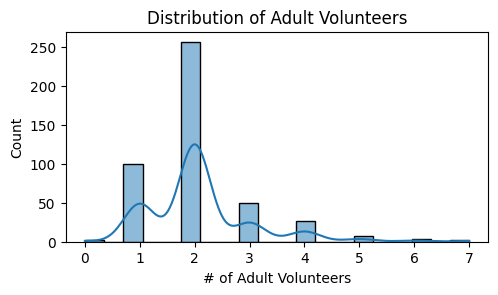

In [165]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

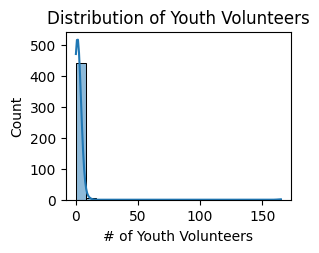

In [166]:
plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

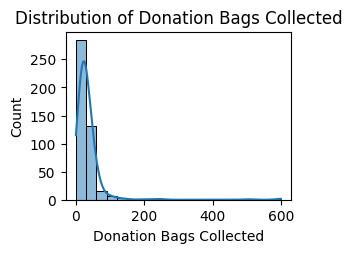

In [167]:
plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

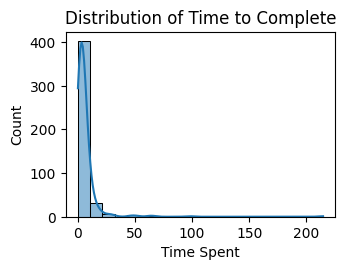

In [168]:
plt.subplot(2, 2, 4)
sns.histplot(data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()

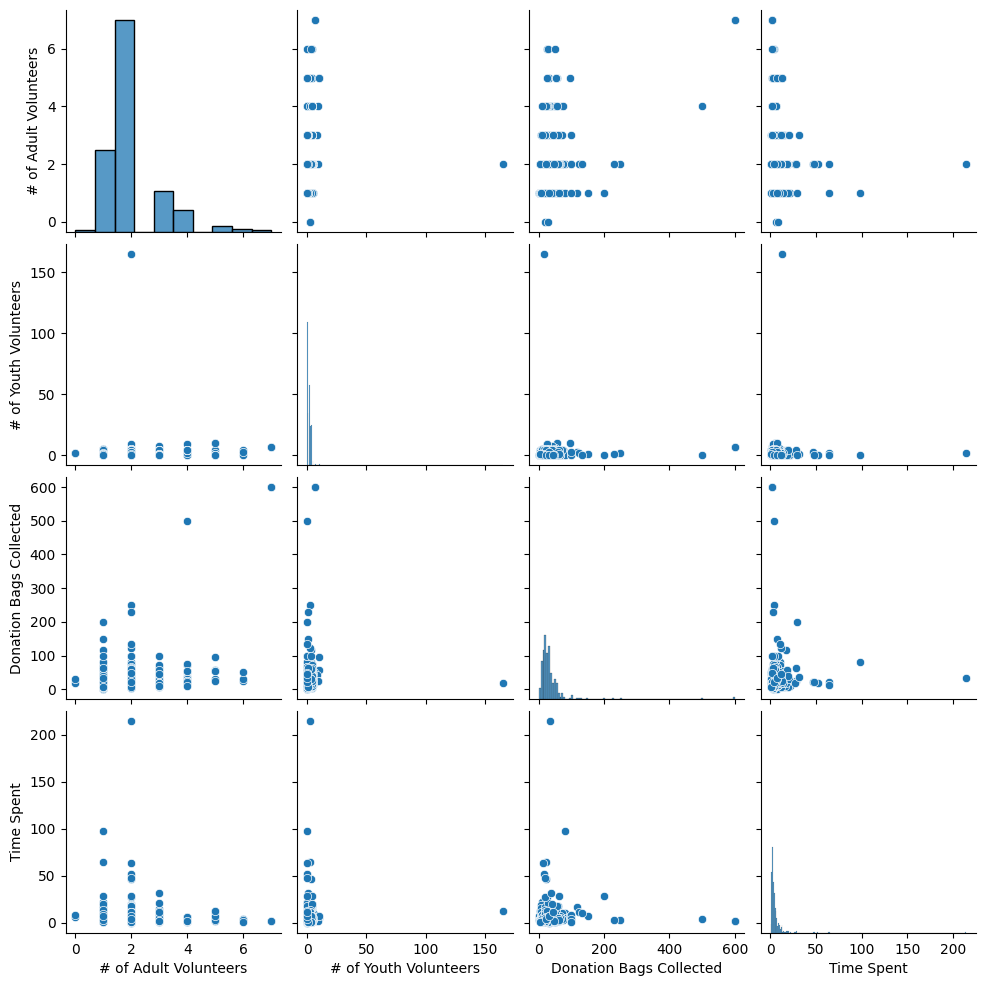

In [169]:
# Visualize relationships between numerical features
sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time Spent']])
plt.show()

In [170]:
# # Visualize relationships between categorical features (if any)
# # Replace 'categorical_column' with your actual categorical column name
if 'categorical_column' in data.columns:
     sns.countplot(x='categorical_column', data=data)
     plt.title('Countplot of Categorical Column')
     plt.show()

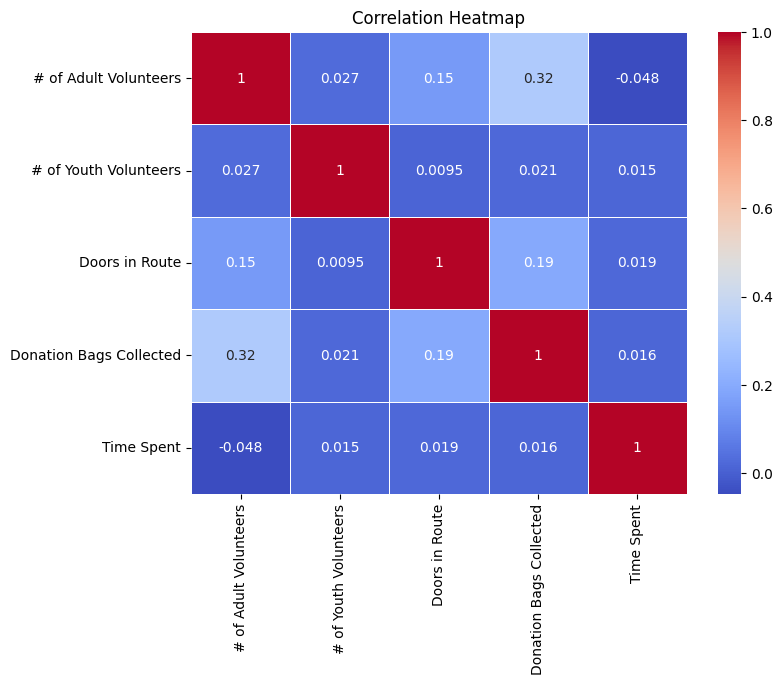

In [171]:
# # Correlation heatmap for numerical features
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

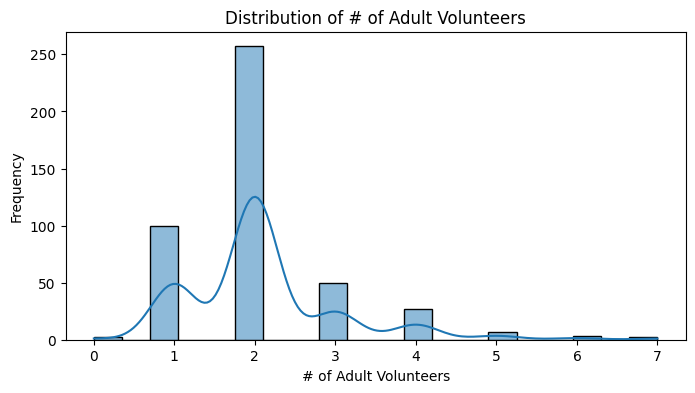

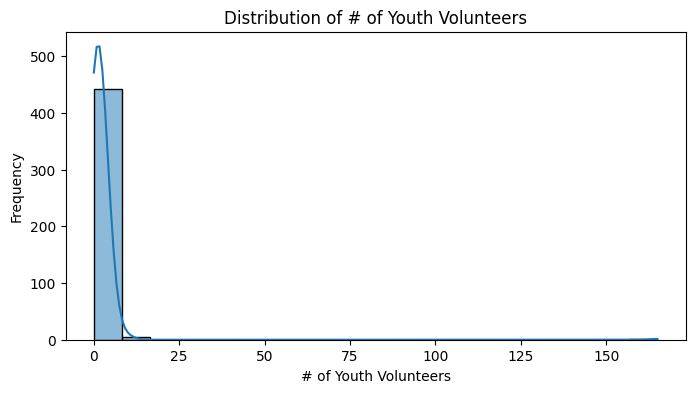

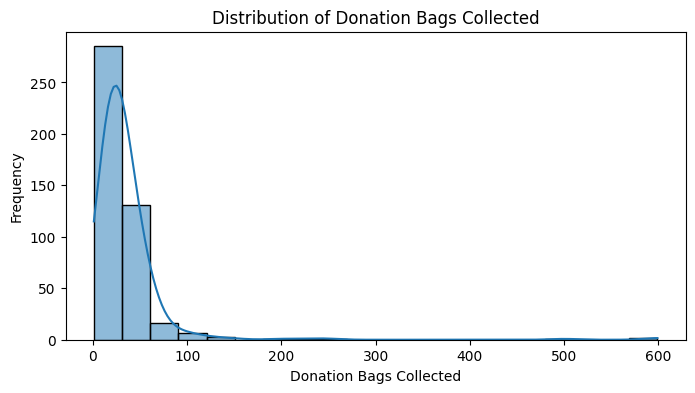

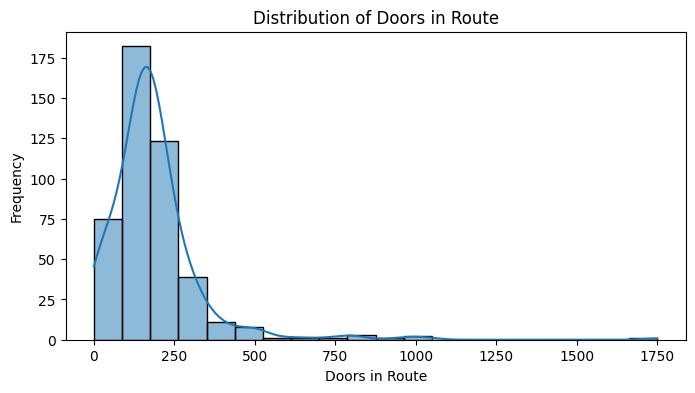

In [173]:
# Distribution of numerical variables
numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

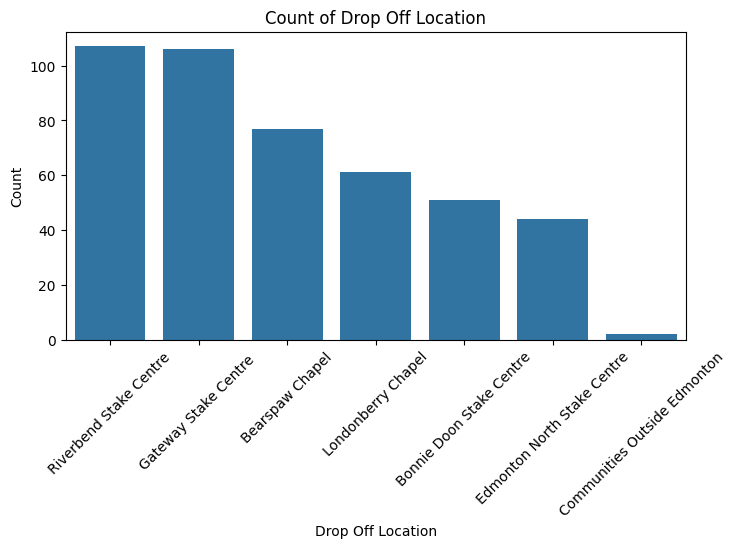

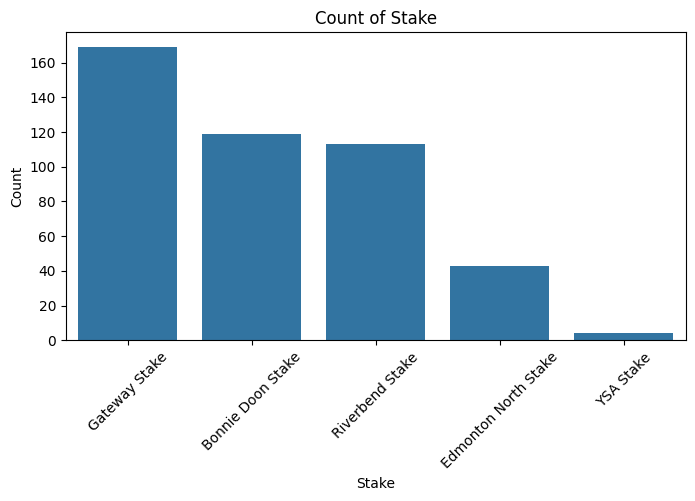

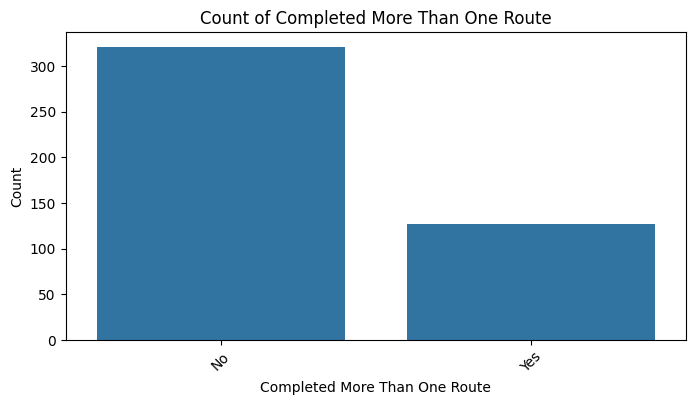

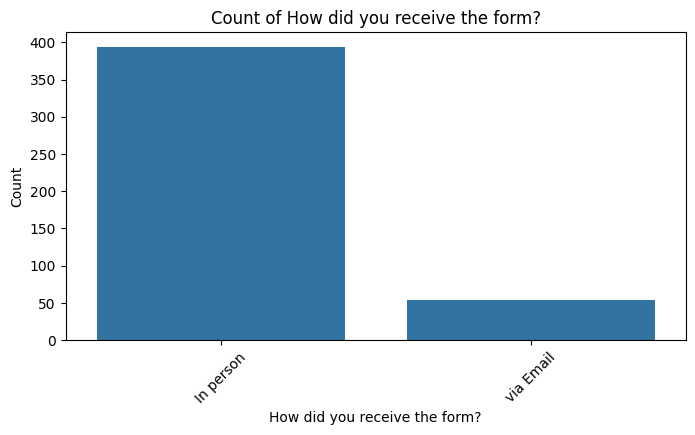

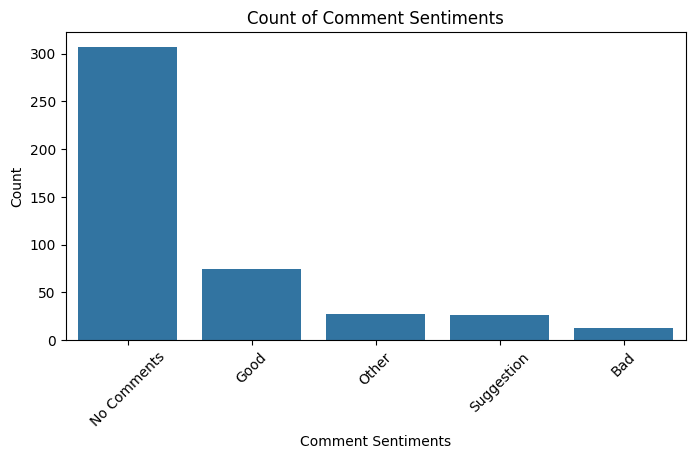

In [175]:
# Count of categorical variables
categorical_columns = ['Drop Off Location','Stake','Completed More Than One Route','How did you receive the form?', 'Comment Sentiments']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-176-067c85bc181c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_bags = data.groupby('Stake')['Donation Bags Collected'].sum()


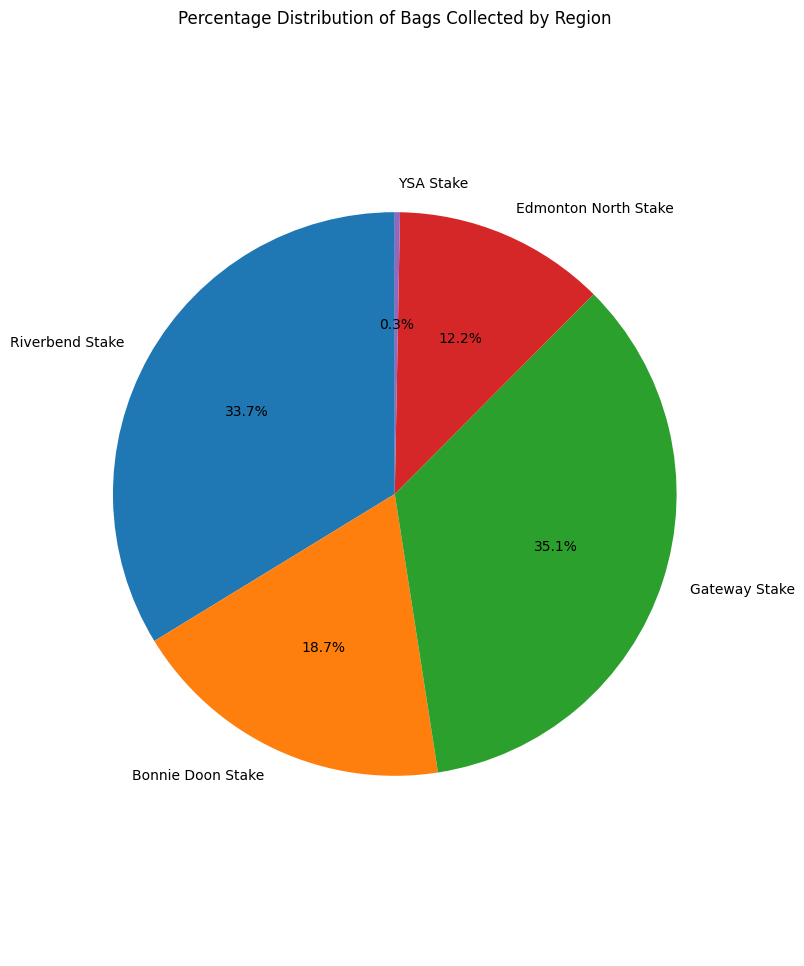

In [176]:
# Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.
import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df' and has columns 'Region' and 'Bags Collected'

# Group by region and calculate the total bags collected for each region
region_bags = data.groupby('Stake')['Donation Bags Collected'].sum()

# Create a pie chart
plt.figure(figsize=(8, 12))
plt.pie(region_bags, labels=region_bags.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Bags Collected by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [177]:
bonnie_doon_data = data[data['Stake'] == 'Bonnie Doon Stake']
bonnie_doon_data.head(450)

How did you receive the form?         Drop Off Location  \
2                       In person        Londonberry Chapel   
4                       In person  Bonnie Doon Stake Centre   
7                       In person  Bonnie Doon Stake Centre   
9                       In person        Londonberry Chapel   
13                      In person  Bonnie Doon Stake Centre   
..                            ...                       ...   
423                     In person  Bonnie Doon Stake Centre   
424                     In person  Bonnie Doon Stake Centre   
425                     via Email           Bearspaw Chapel   
429                     In person  Bonnie Doon Stake Centre   
445                     via Email  Bonnie Doon Stake Centre   

                 Stake    Bonnie Doon Stake Edmonton North Stake  \
2    Bonnie Doon Stake       Clareview Ward                  NaN   
4    Bonnie Doon Stake  Forest Heights Ward                  NaN   
7    Bonnie Doon Stake  Forest Heights Ward                  NaN   
9    Bonnie Doon Stake     Londonderry Ward                  NaN   
13   Bonnie Doon Stake    Connors Hill Ward                  NaN   
..                 ...                  ...                  ...   
423  Bonnie Doon Stake  Forest Heights Ward                  NaN   
424  Bonnie Doon Stake    Connors Hill Ward                  NaN   
425  Bonnie Doon Stake       Southgate Ward                  NaN   
429  Bonnie Doon Stake    Connors Hill Ward                  NaN   
445  Bonnie Doon Stake    Connors Hill Ward                  NaN   

    Gateway Stake Riverbend Stake YSA Stake Time Spent Collecting Donations  \
2             NaN             NaN       NaN                  0 - 30 Minutes   
4             NaN             NaN       NaN                  0 - 30 Minutes   
7             NaN             NaN       NaN                  0 - 30 Minutes   
9             NaN             NaN       NaN                 30 - 60 Minutes   
13            NaN             NaN       NaN                 30 - 60 Minutes   
..            ...             ...       ...                             ...   
423           NaN             NaN       NaN                 30 - 60 Minutes   
424           NaN             NaN       NaN                 30 - 60 Minutes   
425           NaN             NaN       NaN              1 Hour - 1.5 Hours   
429           NaN             NaN       NaN              1 Hour - 1.5 Hours   
445           NaN             NaN       NaN                 30 - 60 Minutes   

     # of Adult Volunteers  # of Youth Volunteers  Doors in Route  \
2                        1                      0               1   
4                        2                      2              20   
7                        2                      0              75   
9                        2                      3              21   
13                       2                      4               0   
..                     ...                    ...             ...   
423                      1                      0             235   
424                      1                      0             200   
425                      3                      0             375   
429                      5                      0             202   
445                      2                      0             150   

     Donation Bags Collected Completed More Than One Route  \
2                          1                            No   
4                         15                            No   
7                          7                            No   
9                         23                            No   
13                        30                            No   
..                       ...                           ...   
423                       21                            No   
424                      100                            No   
425                       58                           Yes   
429                       26    

In [178]:
bonnie_doon_data.shape

(119, 19)

In [180]:
Edmonton_North_Stake_data = data[data['Stake'] == 'Edmonton North Stake']
Edmonton_North_Stake_data.head(450)

How did you receive the form?            Drop Off Location  \
22                      In person  Edmonton North Stake Centre   
34                      In person  Edmonton North Stake Centre   
51                      In person  Edmonton North Stake Centre   
57                      In person  Edmonton North Stake Centre   
61                      In person  Edmonton North Stake Centre   
62                      In person  Edmonton North Stake Centre   
76                      In person  Edmonton North Stake Centre   
79                      In person  Edmonton North Stake Centre   
88                      In person  Edmonton North Stake Centre   
102                     In person  Edmonton North Stake Centre   
110                     In person  Edmonton North Stake Centre   
116                     In person  Edmonton North Stake Centre   
133                     In person  Edmonton North Stake Centre   
137                     In person  Edmonton North Stake Centre   
149                     In person  Edmonton North Stake Centre   
160                     In person  Edmonton North Stake Centre   
190                     In person  Edmonton North Stake Centre   
211                     In person  Edmonton North Stake Centre   
221                     In person  Edmonton North Stake Centre   
234                     In person  Edmonton North Stake Centre   
253                     In person  Edmonton North Stake Centre   
261                     In person  Edmonton North Stake Centre   
275                     In person  Edmonton North Stake Centre   
280                     In person  Edmonton North Stake Centre   
284                     In person  Edmonton North Stake Centre   
298                     In person  Edmonton North Stake Centre   
310                     In person  Edmonton North Stake Centre   
319                     In person  Edmonton North Stake Centre   
326                     In person  Edmonton North Stake Centre   
337                     In person  Edmonton North Stake Centre   
346                     In person  Edmonton North Stake Centre   
360                     In person  Edmonton North Stake Centre   
364                     In person  Edmonton North Stake Centre   
369                     In person  Edmonton North Stake Centre   
372                     In person  Edmonton North Stake Centre   
373                     In person  Edmonton North Stake Centre   
380                     In person  Edmonton North Stake Centre   
398                     In person  Edmonton North Stake Centre   
408                     In person  Edmonton North Stake Centre   
409                     In person  Edmonton North Stake Centre   
410                     In person  Edmonton North Stake Centre   
411                     In person  Edmonton North Stake Centre   
412                     In person  Edmonton North Stake Centre   

                    Stake Bonnie Doon Stake Edmonton North Stake  \
22   Edmonton North Stake               NaN       Griesbach Ward   
34   Edmonton North Stake               NaN           Namao Ward   
51   Edmonton North Stake               NaN           Namao Ward   
57   Edmonton North Stake               NaN           Namao Ward   
61   Edmonton North Stake               NaN           Namao Ward   
62   Edmonton North Stake               NaN       Griesbach Ward   
76   Edmonton North Stake               NaN       Griesbach Ward   
79   Edmonton North Stake               NaN           Namao Ward   
88   Edmonton North Stake               NaN       Griesbach Ward   
102  Edmonton North Stake               NaN           Namao Ward   
110  Edmonton North Stake               NaN       Griesbach Ward   
116  Edmonton North Stake               NaN           Namao Ward   
133  Edmonton North Stake               NaN       Griesbach Ward   
137  Edmonton North Stake               NaN           Namao Ward   
149  Edmonton North Stake               NaN       Griesbach Ward   
160  Edmont

In [181]:
Edmonton_North_Stake_data.shape

(43, 19)

In [182]:
Gateway_Stake_data = data[data['Stake'] == 'Gateway Stake']
Gateway_Stake_data.head(450)

How did you receive the form?             Drop Off Location  \
3                       In person         Gateway Stake Centre    
5                       In person               Bearspaw Chapel   
6                       In person         Gateway Stake Centre    
8                       In person         Gateway Stake Centre    
12                      In person               Bearspaw Chapel   
..                            ...                           ...   
426                     via Email               Bearspaw Chapel   
427                     via Email  Communities Outside Edmonton   
428                     via Email  Communities Outside Edmonton   
436                     via Email               Bearspaw Chapel   
437                     via Email               Bearspaw Chapel   

             Stake Bonnie Doon Stake Edmonton North Stake  \
3    Gateway Stake               NaN                  NaN   
5    Gateway Stake               NaN                  NaN   
6    Gateway Stake               NaN                  NaN   
8    Gateway Stake               NaN                  NaN   
12   Gateway Stake               NaN                  NaN   
..             ...               ...                  ...   
426  Gateway Stake               NaN                  NaN   
427  Gateway Stake               NaN                  NaN   
428  Gateway Stake               NaN                  NaN   
436  Gateway Stake               NaN                  NaN   
437  Gateway Stake               NaN                  NaN   

            Gateway Stake Riverbend Stake YSA Stake  \
3          Lee Ridge Ward             NaN       NaN   
5          Lee Ridge Ward             NaN       NaN   
6       Silver Berry Ward             NaN       NaN   
8    Crawford Plains Ward             NaN       NaN   
12    Blackmud Creek Ward             NaN       NaN   
..                    ...             ...       ...   
426        Lee Ridge Ward             NaN       NaN   
427     Wainwright Branch             NaN       NaN   
428     Wainwright Branch             NaN       NaN   
436        Lee Ridge Ward             NaN       NaN   
437        Lee Ridge Ward             NaN       NaN   

    Time Spent Collecting Donations  # of Adult Volunteers  \
3                    0 - 30 Minutes                      2   
5                   30 - 60 Minutes                      2   
6                   30 - 60 Minutes                      1   
8                   30 - 60 Minutes                      2   
12                   0 - 30 Minutes                      2   
..                              ...                    ...   
426                 30 - 60 Minutes                      2   
427                        2+ Hours                      2   
428                        2+ Hours                      2   
436                  0 - 30 Minutes                      1   
437                  0 - 30 Minutes                      1   

     # of Youth Volunteers  Doors in Route  Donation Bags Collected  \
3                        2              20                       20   
5                        3             144                       25   
6                        0             230                       21   
8                        0             280                       32   
12                       0             135                       26   
..                     ...             ...                      ...   
426                      0             175                       30   
427                      0              99                       11   
428                      0             153                       13   
436                      1             136                       21   
437                      1             166                        8   

    Completed More Than One Route How many routes did you complete?  \
3                              No                                 1   
5                             Yes                                

In [184]:
Gateway_Stake_data.shape

(169, 19)

In [185]:
Riverbend_Stake_data = data[data['Stake'] == 'Riverbend Stake']
Riverbend_Stake_data.head(450)

How did you receive the form?       Drop Off Location            Stake  \
0                       In person         Bearspaw Chapel  Riverbend Stake   
1                       In person         Bearspaw Chapel  Riverbend Stake   
10                      In person  Riverbend Stake Centre  Riverbend Stake   
11                      In person  Riverbend Stake Centre  Riverbend Stake   
21                      In person  Riverbend Stake Centre  Riverbend Stake   
..                            ...                     ...              ...   
442                     via Email  Riverbend Stake Centre  Riverbend Stake   
443                     via Email  Riverbend Stake Centre  Riverbend Stake   
444                     via Email  Riverbend Stake Centre  Riverbend Stake   
446                     via Email  Riverbend Stake Centre  Riverbend Stake   
447                     via Email  Riverbend Stake Centre  Riverbend Stake   

    Bonnie Doon Stake Edmonton North Stake Gateway Stake  \
0                 NaN                  NaN           NaN   
1                 NaN                  NaN           NaN   
10                NaN                  NaN           NaN   
11                NaN                  NaN           NaN   
21                NaN                  NaN           NaN   
..                ...                  ...           ...   
442               NaN                  NaN           NaN   
443               NaN                  NaN           NaN   
444               NaN                  NaN           NaN   
446               NaN                  NaN           NaN   
447               NaN                  NaN           NaN   

           Riverbend Stake YSA Stake Time Spent Collecting Donations  \
0                      NaN       NaN                  0 - 30 Minutes   
1                      NaN       NaN                  0 - 30 Minutes   
10                     NaN       NaN              1 Hour - 1.5 Hours   
11                     NaN       NaN                 30 - 60 Minutes   
21                     NaN       NaN                 30 - 60 Minutes   
..                     ...       ...                             ...   
442        Greenfield Ward       NaN              1 Hour - 1.5 Hours   
443        Greenfield Ward       NaN                 30 - 60 Minutes   
444       Rabbit Hill Ward       NaN                  0 - 30 Minutes   
446        Greenfield Ward       NaN              1 Hour - 1.5 Hours   
447  Terwillegar Park Ward       NaN              1 Hour - 1.5 Hours   

     # of Adult Volunteers  # of Youth Volunteers  Doors in Route  \
0                        7                      7              78   
1                        7                      7              78   
10                       3                      3              45   
11                       2                      4             172   
21                       3                      2              50   
..                     ...                    ...             ...   
442                      2                      3             200   
443                      2                      0             211   
444                      2                      1              58   
446                      1                      0             140   
447                      3                      0             121   

     Donation Bags Collected Completed More Than One Route  \
0                        599                            No   
1                        599                            No   
10                        15                            No   
11                        18                            No   
21                         8                            No   
..                       ...                           ...   
442                      100                            No   
443                       47                            No   
444                        6                            No   
446                       33    

In [186]:
Riverbend_Stake_data.shape

(113, 19)

In [187]:
YSA_Stake_data = data[data['Stake'] == 'YSA Stake']
YSA_Stake_data.head(450)

How did you receive the form?         Drop Off Location      Stake  \
24                      In person  Bonnie Doon Stake Centre  YSA Stake   
25                      In person  Bonnie Doon Stake Centre  YSA Stake   
28                      In person  Bonnie Doon Stake Centre  YSA Stake   
180                     In person           Bearspaw Chapel  YSA Stake   

    Bonnie Doon Stake Edmonton North Stake Gateway Stake Riverbend Stake  \
24                NaN                  NaN           NaN             NaN   
25                NaN                  NaN           NaN             NaN   
28                NaN                  NaN           NaN             NaN   
180               NaN                  NaN           NaN             NaN   

    YSA Stake Time Spent Collecting Donations  # of Adult Volunteers  \
24        NaN                 30 - 60 Minutes                      3   
25        NaN                 30 - 60 Minutes                      1   
28        NaN                 30 - 60 Minutes                      1   
180       NaN                  0 - 30 Minutes                      2   

     # of Youth Volunteers  Doors in Route  Donation Bags Collected  \
24                       0              66                       15   
25                       0             208                       12   
28                       0             208                       12   
180                      0             153                        8   

    Completed More Than One Route How many routes did you complete?  \
24                             No                                 1   
25                             No                                 1   
28                             No                                 1   
180                            No                                 1   

    Comment Sentiments                               Comments or Feedback  \
24         No Comments                                        No Comments   
25         No Comments                                        No Comments   
28         No Comments                                        No Comments   
180              Other  Did half of the doors in route didn’t know the...   

             COMBINED STAKES  Time Spent  
24       Mill Creek YSA Ward    4.616667  
25   Whitemud Creek YSA Ward    1.066667  
28   Whitemud Creek YSA Ward    1.233333  
180  Whitemud Creek YSA Ward   19.066667

In [188]:
YSA_Stake_data.shape

(4, 19)

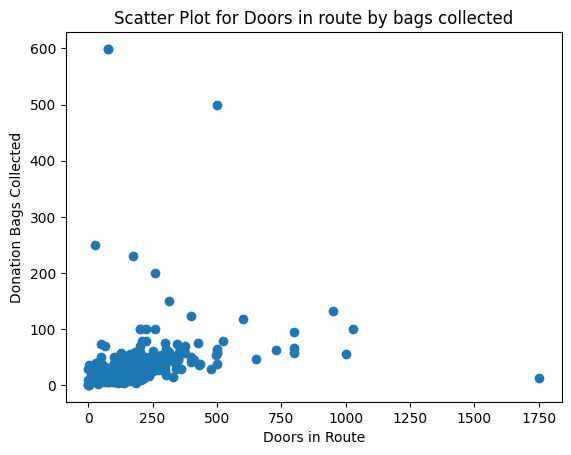

In [189]:
plt.scatter(data['Doors in Route'], data['Donation Bags Collected'])
plt.xlabel('Doors in Route')
plt.ylabel('Donation Bags Collected')
plt.title('Scatter Plot for Doors in route by bags collected')
plt.show()

<ipython-input-191-0dc7f9c668a9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)


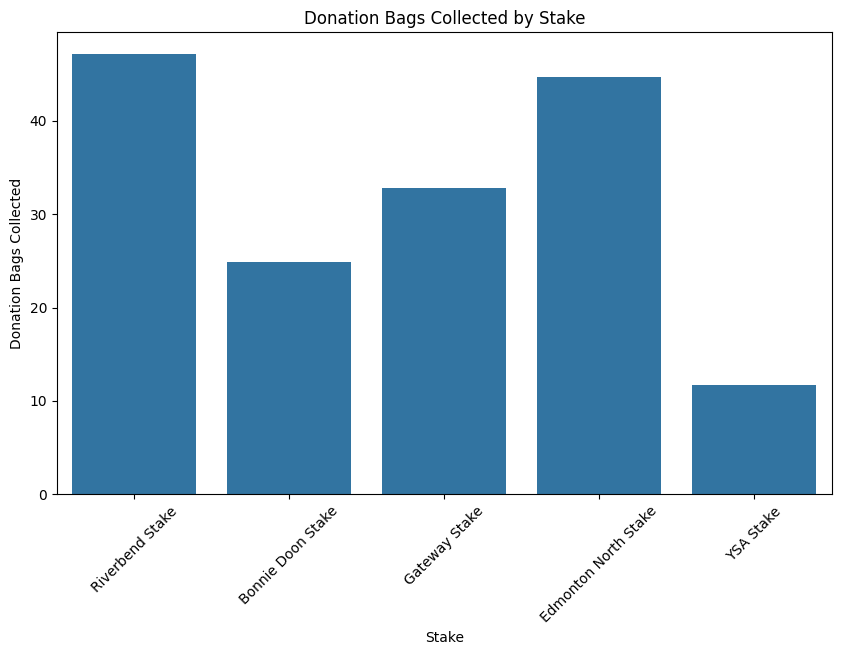

In [191]:
# Visualizations (customize as needed)
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   How did you receive the form?      448 non-null    category
 1   Drop Off Location                  448 non-null    object  
 2   Stake                              448 non-null    category
 3   Bonnie Doon Stake                  119 non-null    category
 4   Edmonton North Stake               43 non-null     category
 5   Gateway Stake                      169 non-null    category
 6   Riverbend Stake                    96 non-null     category
 7   YSA Stake                          0 non-null      category
 8   Time Spent Collecting Donations    448 non-null    category
 9   # of Adult Volunteers              448 non-null    int64   
 10  # of Youth Volunteers              448 non-null    int64   
 11  Doors in Route                     448 non-nu

In [193]:
data = data.drop(columns=['Bonnie Doon Stake', 'Edmonton North Stake', 'Gateway Stake', 'Riverbend Stake', 'YSA Stake'])

In [194]:
data.head()

How did you receive the form?         Drop Off Location              Stake  \
0                     In person           Bearspaw Chapel    Riverbend Stake   
1                     In person           Bearspaw Chapel    Riverbend Stake   
2                     In person        Londonberry Chapel  Bonnie Doon Stake   
3                     In person     Gateway Stake Centre       Gateway Stake   
4                     In person  Bonnie Doon Stake Centre  Bonnie Doon Stake   

  Time Spent Collecting Donations  # of Adult Volunteers  \
0                  0 - 30 Minutes                      7   
1                  0 - 30 Minutes                      7   
2                  0 - 30 Minutes                      1   
3                  0 - 30 Minutes                      2   
4                  0 - 30 Minutes                      2   

   # of Youth Volunteers  Doors in Route  Donation Bags Collected  \
0                      7              78                      599   
1                      7              78                      599   
2                      0               1                        1   
3                      2              20                       20   
4                      2              20                       15   

  Completed More Than One Route How many routes did you complete?  \
0                            No                                 1   
1                            No                                 1   
2                            No                                 1   
3                            No                                 1   
4                            No                                 1   

  Comment Sentiments Comments or Feedback      COMBINED STAKES  Time Spent  
0        No Comments          No Comments        Woodbend Ward    1.300000  
1        No Comments          No Comments        Woodbend Ward    1.300000  
2        No Comments          No Comments       Clareview Ward    3.716667  
3        No Comments          No Comments       Lee Ridge Ward    2.683333  
4        No Comments          No Comments  Forest Heights Ward    3.450000

In [195]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
How did you receive the form?        0
Drop Off Location                    0
Stake                                0
Time Spent Collecting Donations      0
# of Adult Volunteers                0
# of Youth Volunteers                0
Doors in Route                       0
Donation Bags Collected              0
Completed More Than One Route        0
How many routes did you complete?    0
Comment Sentiments                   0
Comments or Feedback                 0
COMBINED STAKES                      0
Time Spent                           0
dtype: int64


In [196]:
# prompt: download the cleaned data

from google.colab import files

data.to_csv('Cleaned_food_drive_data.csv', index=False)
files.download('Cleaned_food_drive_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
!pip install pandas-profiling[notebook,html]

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0c8751068bf60041658ddfae471592f657e1c140676af522ea2ce49b00236fae
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [198]:
import pandas as pd
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
from ydata_profiling.utils.cache import cache_file # Use ydata_profiling instead of pandas_profiling

In [199]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [200]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Cleaning and handling:-
1 Answer: To handle the missing values in the dataset, I calculated the mean of various columns to fill the missing values by using the fillna function. Sherwood stake column had no value in it, it was all empty so I dropped that column. To find missing values in “Did you complete more than 1 route?” that contain information in the “yes” and “no” I converted them into Boolean values 1 and 0 respectively and filled the mean in place of the missing values. For handling missing values in categorical columns, I filled “No comments” instead of missing values.
2 Answer: To determine the data types for columns in the dataset I used dtypes and data.info() functions to allocate different data types for each column whether it was object, integer, float, etc. For converting the data types of columns, I used .astype(int) and .astype(float). The categorical columns were classified to optimize memory and ensure the performance of the model.
3 Answer: To deal with the outliers in the dataset I deleted the data in those particular cells and then filled the values with mean in respective columns.

Data Visualization:-
1 Answer: To capture insights from the data, I have used different types of visualisations such as bar charts, histograms, scatter plots, heatmaps, line graphs and pie charts.  For instance, a Pie chart is used to analyse the numerical proportion of the data, a heatmap is a good visual to find the correlation between the variables i.e. whether it is positively correlated or negatively correlated or has no correlation. Furthermore, the bar graph is used to make the comparison in the different variables of the dataset; despite finding the outliers in the dataset, the scatter plot is the most optimal visualisation.
Answer 2 = A Pie chart is used to find the stake with the highest percentage of donation bags collected in which it was observed that Gateway Stake had the highest number of food bags collected and least was from YSA Stake. Moreover, a heatmap is a good visual to find the correlation between the variables i.e. whether it is positively correlated or negatively correlated or has no correlation from the heatmap in the dataset it is visible that the dataset is almost positively correlated in which it was observed that time spent and number of donation bags had a positive correlation. Furthermore, the bar graph is used to compare the number of donation bags collected based on the different stakes and wards and compare how many complete more than one route. Despite finding the outliers in the dataset, the scatter plot is the most optimal visualisation.

3 Answer: The visualisation in the dataset helps in identifying clusters, relationships and trends in the data. For instance, a Scatter plot helps to see the potential linear relationships in the various variables of the datasets, line graphs help to analyse the trends based on the different wards and branches, and box plots are used to identify the outliers in the dataset, bar graphs are used to compare the data based on various ward/ branch and stake over the number of bags collected and histograms helps to understand the shape of distribution based on the different variables.
Feature Engineering:-
Answer 1 = Various stake columns were merged into a single column, graphs were created to get insights from the data, to analyze the comments categories were divided so that the reviews of the volunteers could be understood, fillna function was used to fill the empty values in categorical columns by adding “No comments”. Unique() function was used to find the number of unique values present in various columns.Unique() function was used to find the number of unique values present in various columns. Data type was changed from object to category.
